# **UAL Tech - WorkFlow em Ciência de Dados**

# 1. Importar Bibliotecas que serão utilizadas

In [1]:
#manipulação dos dados
import pandas as pd 

#configuração da pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', None)

#biblioteca para gráficos
import matplotlib.pyplot as plt

#biblioteca de visualizações estatísticas
import seaborn as sns

#resumo de Análise Exploratória dos dados
from pandas_profiling import ProfileReport
import sweetviz as sv

# Quebra dos dados em train /  test
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

#Modelos de Classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Validação Cruzada
from sklearn.model_selection import cross_val_score

#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Tuning de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

#Serialização do Modelo
import pickle



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14452\3626820782.py:18: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# 2. Coletar e Entender os Dados

## 2.1 MetaDados


São Informações que acrescem aos dados e tem por objetivos trazer informações adicionais sobre os dados que estão sendo trabalhados.

In [2]:
metadados = pd.read_csv('metadata.csv', sep = ';')
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,Categorical nominal,"type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,categorical nominal,"marital status ('divorced','married','single','unknown', note: 'divorced' means divorced or widowed)"
3,education,categorical nominal,"('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,categorical nominal,"has credit in default? ('no','yes','unknown')"
5,housing,categorical nominal,"has housing loan? ('no','yes','unknown')"
6,loan,categorical nominal,"has personal loan? ('no','yes','unknown')"
7,contact,categorical nominal,"contact communication type ('cellular','telephone')"
8,month,categorical ordinal,"last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,categorical ordinal,"last contact day of the week ('mon','tue','wed','thu','fri')"


## 2.2 Importar os dados que iremos trabalhar

In [3]:
df = pd.read_csv('new_train.csv', sep=',')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32940,30,management,married,university.degree,no,no,yes,cellular,jul,mon,833,5,999,0,nonexistent,no
32941,28,blue-collar,single,basic.9y,no,yes,no,cellular,apr,thu,315,1,2,1,success,yes
32942,44,entrepreneur,married,professional.course,no,yes,no,telephone,nov,mon,291,3,999,0,nonexistent,no
32943,47,admin.,married,basic.9y,no,yes,no,telephone,nov,fri,64,3,999,0,nonexistent,no
32944,29,blue-collar,married,basic.6y,no,no,no,cellular,may,thu,16,7,999,0,nonexistent,no
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [5]:
# Verificar o tamanho da base
df.shape

(32950, 16)

In [6]:
# Verificar as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [7]:
# Verifica se há dados faltantes em porcentagem
df.isnull().sum()/len(df)

age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
duration       0.0
campaign       0.0
pdays          0.0
previous       0.0
poutcome       0.0
y              0.0
dtype: float64

## 2.3 Qual a pergunta que queremos responder?

Gostaria de prever se uma pessoa tem maior probabilidade de aceitar o nosso investimento, quando eu não tenho a resposta.

Qual modelo é melhor? Árvore, Random Forest ou Gradiente Boosting
 
Mas se fosse outra base de dados, poderíamos perguntar quais dos nossos leads tem maior capacidade de virar nosso cliente, ou qual o melhor horário para postar um stories no Instagram que gera maior engajamento, ou qual a melhor campanha usar para um determinado público, etc.

# 3. Análise Exploratória dos Dados

In [8]:
# Vamos verificar a quantidade de dados únicos temos para cada variável
df.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

"duration" tem 1467 dados diferentes (4,5% dos dados). Quando uma variável tem muitos elementos diferentes o modelo fica ineficiente para generalizar informações.

Se fossem muitos dados nós poderíamos separar em intervalos de duração da ligação.

In [9]:
# Olhando as informações básicas estatísticas dos dados numéricos
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


- A média de idades presentes nesses dados é de 40 anos, onde a idade mínima é 17 anos e a máxima é de 98 anos;
O tempo médio do contato (ligação) foi de 258 segundos (duration). Quantas pessoas não atenderam a ligação? Pois quando não atende é atribuído que a pessoa não fez o investimento.

- Dependendo da situação podemos remover os dados de pessoas que não atenderam a ligação.

In [10]:
duration_zero = df['duration'].value_counts().get(0.000000)
duration_zero

4

Podemos pensar então em uma duração mínima em uma ligação (5 minutos)

In [11]:
duration_min = (df['duration'] < 300.0).sum()
duration_min

23958

72% das pessoas presentes nesta base ficou menos de 5 min conversando, mas como as perguntas são de rápida resposta, o questionário deve durar por volta de 1 min.

In [12]:
duration_min2 = (df['duration'] < 60.0).sum()
duration_min2

3335

- 10% da base ficou menos de 1 min no telefone, podemos pensar em remover esses dados no futuro, ou não. 

- Teve vezes que os aplicadores do questionário chegou a ligar 56 vezes para um contato (campaign), mas na média teve aproximadamente 3 ligações

- A maioria dos contatos foram feitos pela primeira vez (999) - pdays indica o tempo entre o contato desta campanha e a campanha anterior.

- Será que as pessoas que foram contactadas na campanha anterior realizaram o investimento, nesta campanha?

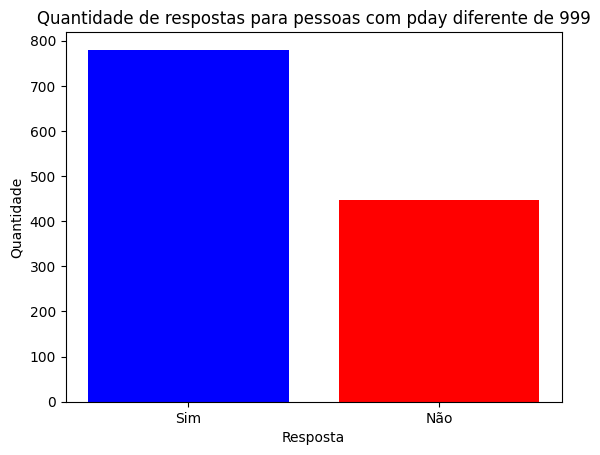

In [13]:
# Filtrar os dados para pessoas com pday diferente de 999
contactados = df[df['pdays'] != 999]

# Contar a quantidade de 'sim' e 'não' para pessoas com pday diferente de 999
contactados_sim = contactados[contactados['y'] == "yes"].shape[0]
contactados_nao = contactados[contactados['y'] == "no"].shape[0]

quantidades = [contactados_sim, contactados_nao]
categorias = ["Sim", 'Não']

# Criar gráfico de barras
plt.bar(categorias, quantidades, color=['blue', 'red'])

# Adicionar título e rótulos dos eixos
plt.title('Quantidade de respostas para pessoas com pday diferente de 999')
plt.xlabel('Resposta')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()

A maioria das pessoas que foram contactadas anteriormente, realizaram o investimento

previous mostra o número de campanhas anteriores que já foram oferecidas para cada cliente. E no máximo, os cliente foram contactados em 7 campanhas.

Qual a distribuição de clientes por contatos em campanhas anteriores?

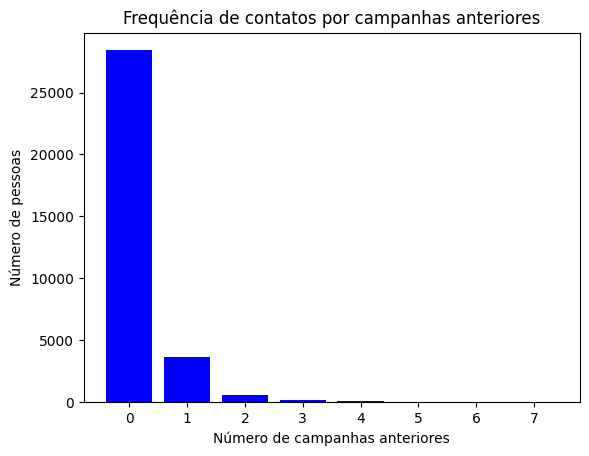

In [14]:
# Calcular a frequência de contatos por campanhas anteriores
frequencia_contatos = df['previous'].value_counts().sort_index()

# Plotar o gráfico de frequência
plt.bar(frequencia_contatos.index, frequencia_contatos.values, color='blue')

# Adicionar título e rótulos dos eixos
plt.title('Frequência de contatos por campanhas anteriores')
plt.xlabel('Número de campanhas anteriores')
plt.ylabel('Número de pessoas')

# Exibir o gráfico
plt.show()

- A maior parte foi contatada pela primeira vez

- Vamos ver como é a relação das variáveis 2 a 2

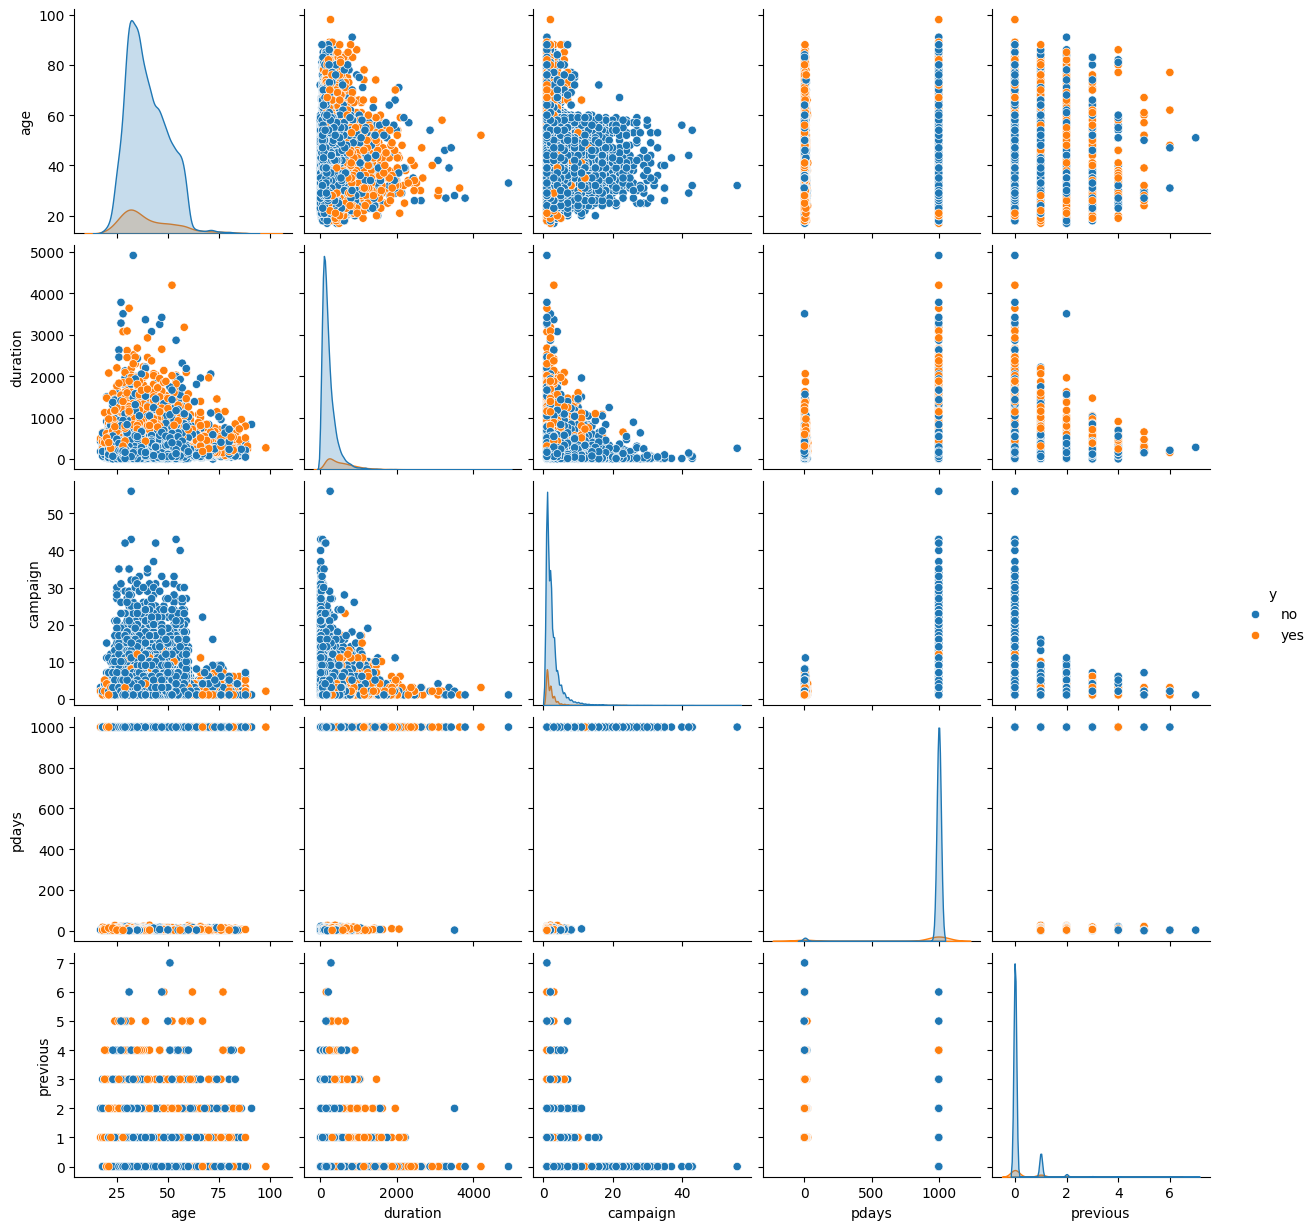

In [15]:
sns.pairplot(df, hue='y')

-  Vamos olhar agora essas informações de maneira resumida

In [16]:
resumo_EDA = ProfileReport(df, title='Resumo EDA')
resumo_EDA.to_file('Resumo EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'cellular'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

include the error message: 'could not convert string to float: 'cellular'' -> Só consegue avaliar dados numéricos

In [17]:
#usando agora a biblioteca Swetviz
EDA_sv = sv.analyze(df, target_feat='y')
EDA_sv.show_html("resumo_EDA_Sweetviz.html")

                                             |          | [  0%]   00:00 -> (? left)

Report resumo_EDA_Sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 4. Feature Engineering (Engenharia das variáveis)

Vamos usar os insights da EDA e transformar em variáveis

- uma das coisas que verificamos é que não foi possível analisar as variáveis categorias, vamos precisar transformar elas para que possam ser analisadas.

poutcome me diz qual foi o resultado da campanha anterior

In [18]:
df['poutcome'].value_counts()

poutcome
nonexistent    28416
failure         3429
success         1105
Name: count, dtype: int64

Vamos juntar a poutcome com a previous (número de contatos realizados anteriormente) para criar uma nova variável (feature) que represente a dificuldade de converter a pessoa.

In [19]:
df['difficulty'] = -1 #desconhecido
#1 ligação e já converteu
df.loc[(df['poutcome'] == 'success') & (df['previous'].between(0,1)), 'difficulty'] = 0 #fácil
# 2 a 4 ligações e converteu
df.loc[(df['poutcome'] == 'success') & (df['previous'].between(2,4)), 'difficulty'] = 1 #médio
# 5 a 7 ligações e converteu
df.loc[(df['poutcome'] == 'success') & (df['previous'].between(5,7)), 'difficulty'] = 2 #difícil
# se não converteu
df.loc[(df['poutcome'] == 'failure'), 'difficulty'] = 3 #muito difícil
# se não teve contato anterior
df.loc[(df['poutcome'] == 'nonexistent'), 'difficulty'] = 4 #sem contato anterior
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,difficulty
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,4
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,3
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes,4
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,4
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,4


In [20]:
df['difficulty'].value_counts()

difficulty
4    28416
3     3429
0      697
1      391
2       17
Name: count, dtype: int64

## 4.1 Tabela Analítica de Dados (ABT)

É a tabela que será usada para modelagem

1º Vamos separar as variáveis explicativas da variável resposta

In [21]:
explicativas = df.drop(columns=['y'])

In [22]:
#transformar yes e no em numérica
var_resp = df['y']
var_resp = var_resp.replace('no', 0)
var_resp = var_resp.replace('yes', 1)
var_resp.value_counts()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14452\3217848661.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  var_resp = var_resp.replace('yes', 1)


y
0    29238
1     3712
Name: count, dtype: int64

2º Precisamos transformar as variáveis categóricas em numérica. Usaremos uma técnica de Encoding.


In [23]:
#separando as variáveis categóricas e numéricas
expl_cat = explicativas[['job', 'marital', 'education','default', 'housing','loan', 'contact','month', 'day_of_week','poutcome', 'difficulty']]
expl_num = explicativas[['age','duration','campaign','pdays','previous']]

In [24]:
expl_cat_encoding = pd.get_dummies(expl_cat, prefix_sep='_', columns=expl_cat.columns, drop_first=True, dtype='int')
expl_cat_encoding.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,difficulty_1,difficulty_2,difficulty_3,difficulty_4
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


- Construindo nossa Tabela Analitica de Dados

In [25]:
df_abt = expl_num.merge(expl_cat_encoding, left_index=True, right_index=True)
df_abt.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,difficulty_1,difficulty_2,difficulty_3,difficulty_4
0,49,227,4,999,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,37,202,2,999,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,78,1148,1,999,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,36,120,2,999,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,59,368,2,999,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [26]:
df_abt.shape

(32950, 52)

## 4.2 Feature Selection

Vamos aplicar um método que observa quais variáveis (colunas) são importantes no modelo.

Essa é uma etapa importante da modelagem, para evitar usar variáveis que não discriminem a nossa variável resposta e que aumente a complexidade na geração da Tabela analítica dos dados.

É importante lembrar que existem vários métodos para isso, como:
  - Filter Methods
  - Wrapper Methods
  - Embedded Methods
  ...

### 4.2.1 Método Chi² para variáveis categóricas

In [27]:
#normalização das variáveis
expl_cat_norm = MinMaxScaler().fit_transform(expl_cat_encoding)
expl_cat_norm



array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
#agora vamos usar o o método, onde k é o número de variáveis que você quer que seja selecionado. 
# Então ele escolhe as melhores variáveis baseadas nos melhores valores do método.


chi_selector = SelectKBest(chi2, k=5)
#passar as variáveis explicativas e a variável resposta
chi_selector.fit(expl_cat_norm, var_resp)


SelectKBest(k=5, score_func=<function chi2 at 0x00000206DE5C2C00>)

Vamos olhar o resultado do Modelo para verificar se k=5 é uma boa escolha

In [29]:
scores = chi_selector.scores_
chi_support = chi_selector.get_support()

df_features = pd.DataFrame({
    'Feature': expl_cat_encoding.columns,  
    'Score': scores,
    'Selected': chi_support
})

df_features.sort_values(by='Score', ascending=False)


,Feature,Score,Selected
42,poutcome_success,3178.282908,True
43,difficulty_1,1535.109331,True
32,month_mar,646.662900,True
35,month_oct,601.502616,True
36,month_sep,516.147820,True
27,contact_telephone,428.971649,False
4,job_retired,275.938099,False
33,month_may,266.345511,False
7,job_student,263.696664,False
21,default_unknown,255.274811,False


Ao invés de fixar o valor do número de variáveis, poderíamos fazer um teste estatístico para analisar se a variável é relevante ou não e separar baseada em dados estatísticos.

Agora precisamos extrair o resultado do modelo aplicado anteriormente.

In [30]:
chi_feature = expl_cat_encoding.loc[:, chi_support].columns.tolist
chi_feature

<bound method IndexOpsMixin.tolist of Index(['month_mar', 'month_oct', 'month_sep', 'poutcome_success',
       'difficulty_1'],
      dtype='object')>

Ele então selecionou as variáveis colocando True nas 5 que apresentaram melhor resultado que influência na variável resposta

### 4.2.2 Método de Regressão Logística para Variáveis Numéricas

Suponha que você tenha um conjunto de dados com 10 características. Com step=1, o RFE começará com todas as 10 características, treinará o modelo de regressão logística, avaliará a importância das 10 características, e então removerá a menos importante.

In [31]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=3, step=1)
expl_num_norm = MinMaxScaler().fit_transform(expl_num)
rfe_selector.fit(expl_num_norm, var_resp)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=3)

In [32]:
rfe_support = rfe_selector.get_support()
rfe_rankings = rfe_selector.ranking_

df_rfe_features = pd.DataFrame({
    'Feature': expl_num.columns,  
    'Ranking': rfe_rankings,
    'Selected': rfe_support
})

df_rfe_features.sort_values(by='Ranking', ascending=True)

,Feature,Ranking,Selected
1,duration,1,True
2,campaign,1,True
3,pdays,1,True
4,previous,2,False
0,age,3,False


In [33]:
rfe_feature = expl_num.loc[:, rfe_support].columns.tolist
rfe_feature

<bound method IndexOpsMixin.tolist of Index(['duration', 'campaign', 'pdays'], dtype='object')>

### 4.2.3 Selecionando a Base com relação as variáveis selecionadas


Quero olhar antes as correlações das variáveis com a variável resposta, para saber se era possível separar as variáveis olhando as correlações.

- Numéricas Selecionadas ('duration', 'campaign', 'pdays')
- Categóricas Selecionadas ('month_mar', 'month_oct', 'month_sep', 'poutcome_success', difficulty_1')

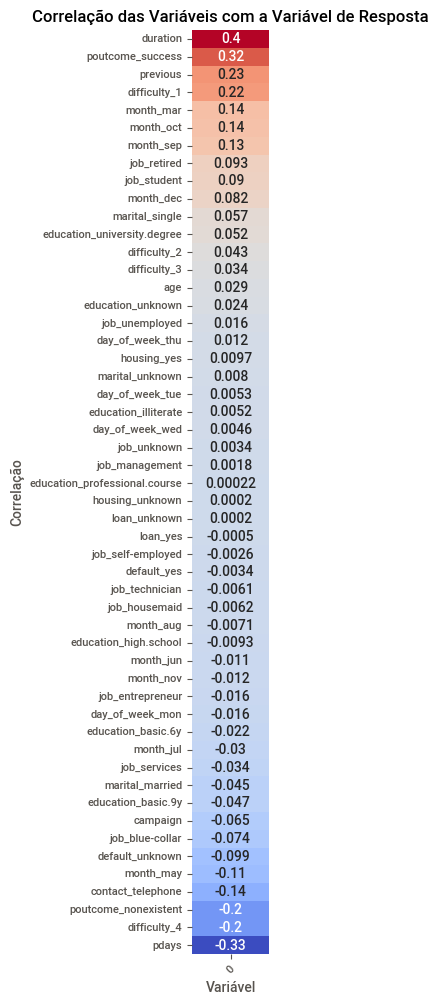

In [34]:
# Calcular a matriz de correlação entre df_abt e var_resp
corr = df_abt.corrwith(var_resp).sort_values(ascending=False)

# Criar um heatmap com uma única coluna
plt.figure(figsize=(1, 12))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlação das Variáveis com a Variável de Resposta')
plt.xlabel('Variável')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.show()

Pensando nas variáveis que foram selecionadas, será que é viável?

In [35]:
#'month_mar', 'month_oct', 'month_sep', 'poutcome_success', 'difficulty_1'
#Vamos trazer todos os meses, todos os poutcome e todas as dificuldades

#vamos trazer somente as variáveis que iremos trabalhar
expl_num_feature_selection = expl_num[['duration', 'campaign', 'pdays']]
expl_cat_feature_selection = expl_cat[['month', 'poutcome', 'difficulty']]
expl_cat_feature_selection = pd.get_dummies(expl_cat_feature_selection, prefix_sep='_', 
                                            columns=expl_cat_feature_selection.columns, 
                                            drop_first=True, dtype = int)

explicativas_modelagem = expl_num_feature_selection.merge(expl_cat_feature_selection, left_index=True, right_index=True)
explicativas_modelagem.head()

,duration,campaign,pdays,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_1,difficulty_2,difficulty_3,difficulty_4
0,227,4,999,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,202,2,999,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1148,1,999,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,120,2,999,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,368,2,999,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [71]:
explicativas_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   duration              32950 non-null  int64
 1   campaign              32950 non-null  int64
 2   pdays                 32950 non-null  int64
 3   month_aug             32950 non-null  int32
 4   month_dec             32950 non-null  int32
 5   month_jul             32950 non-null  int32
 6   month_jun             32950 non-null  int32
 7   month_mar             32950 non-null  int32
 8   month_may             32950 non-null  int32
 9   month_nov             32950 non-null  int32
 10  month_oct             32950 non-null  int32
 11  month_sep             32950 non-null  int32
 12  poutcome_nonexistent  32950 non-null  int32
 13  poutcome_success      32950 non-null  int32
 14  difficulty_1          32950 non-null  int32
 15  difficulty_2          32950 non-null  int32
 16  diff

# 5. Aplicando o Modelo de Machine Learning

## 5.1 Quebrando a base entre treino e teste

O Algorítimo irá utilizar os dados de treino para aprender, e depois usar o que aprendeu no teste.

No treino o modelo tem os dados das variáveis explicativas e da variável resposta.

No teste o modelo só vai saber as explicativas, e poderemos usar a variável resposta para saber se o modelo está acertando ou não além de metrificar se o modelo está bom ou não.

In [36]:
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas_modelagem,
                                                        var_resp,
                                                        test_size=0.3,
                                                        random_state=42)



In [37]:
x_treino.head()

,duration,campaign,pdays,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_1,difficulty_2,difficulty_3,difficulty_4
24186,39,3,999,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
18087,90,2,999,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
6950,114,3,999,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8200,138,3,999,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
16051,252,1,999,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [38]:
x_teste.head()

,duration,campaign,pdays,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_1,difficulty_2,difficulty_3,difficulty_4
20628,22,5,999,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4344,119,1,999,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
20933,293,1,999,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4641,355,4,999,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4638,14,21,999,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


Para treinamento de um modelo de Machine Learning Clássico:
1. Importar os modelos que serão utilizados;
2. Instanciar o objeto em memória;
3. Treinamento;
4. Auferir os resultados.

## 5.2 Modelos de Classificação

### 5.2.1 Aplicando o Modelo

In [39]:
#instanciando objetos em memória
# Árvore de Decisão
tree = DecisionTreeClassifier(random_state=42)
# Floresta 
rf = RandomForestClassifier(n_estimators=400, random_state=42) #floresta com 400 árvores
# gradiente boosting
gb = GradientBoostingClassifier(n_estimators=400, random_state=42)

Esses modelos tem como colocar vários tipos de variáveis, mas não vamos nos aprofundar nisso

In [40]:
tree.fit(x_treino, y_treino)
rf.fit(x_treino, y_treino)
gb.fit(x_treino, y_treino)

GradientBoostingClassifier(n_estimators=400, random_state=42)

### 5.2.2 Auferir os resultados por Acurácia

#### 5.2.2.1 Árvore de Decisão

O Modelo faz previsões sobre os dados "x" e compara com os resultados reais "y"

In [41]:
#Base de Treino: são os dados usados para ajustar o modelo
acu_tree_treino = accuracy_score(y_treino, tree.predict(x_treino))
acu_tree_treino

0.981010188597442

A acurácia nos dados de treinamento fornece uma indicação de quão bem o modelo se ajusta aos dados que foram usados para treiná-lo.

In [42]:
#Base de Teste: São os dados usados para avaliar o modelo em dados não vistos
acu_tree_teste = accuracy_score(y_teste, tree.predict(x_teste))
acu_tree_teste

0.8763783510369246

 A acurácia nos dados de teste é uma medida mais importante, pois fornece uma avaliação do desempenho do modelo em dados que não foram usados durante o treinamento.

Um modelo que tenha uma acurácia alta nos dados de treinamento, mas uma acurácia significativamente mais baixa nos dados de teste, pode estar sofrendo de overfitting, ou seja, está se ajustando demais aos dados de treinamento e não generalizando bem para novos dados. Portanto, é importante monitorar a diferença entre a acurácia nos dados de treinamento e nos dados de teste para garantir que o modelo esteja generalizando adequadamente.

#### 5.2.2.2 Random Forest

In [43]:
#Treino
acu_rf_treino = accuracy_score(y_treino, rf.predict(x_treino))
acu_rf_treino

0.981010188597442

In [44]:
#Teste
acu_rf_teste = accuracy_score(y_teste, rf.predict(x_teste))
acu_rf_teste

0.8815376833586241

#### 5.2.2.3 Gradiente Boosting

In [45]:
#Treino
acu_gb_treino = accuracy_score(y_treino, gb.predict(x_treino))
acu_gb_treino

0.9248211575980924

In [46]:
#Teste
acu_gb_teste = accuracy_score(y_teste, gb.predict(x_teste))
acu_gb_teste

0.9061203844208396

In [47]:
#Resumo desses resultados
Resultado_acu = {
    'Método': ['Tree', 'Tree', 'RF', 'RF', 'GB', 'GB'],
    'Conjunto': ['Treino', 'Teste'] * 3,
    'Acurácia': [acu_tree_treino, acu_tree_teste, 
                 acu_rf_treino, acu_rf_teste,
                 acu_gb_treino, acu_gb_teste]
}
pd.DataFrame(Resultado_acu)

,Método,Conjunto,Acurácia
0,Tree,Treino,0.981010
1,Tree,Teste,0.876378
2,RF,Treino,0.981010
3,RF,Teste,0.881538
4,GB,Treino,0.924821
5,GB,Teste,0.906120


### 5.2.3 Tuning de Hiperparâmetros

- mas antes vamos entender o Cross Validation:

É uma abordagem poderosa para estimar a habilidade de generalização de um modelo em dados não vistos. Em vez de dividir os dados em um conjunto de treinamento e um conjunto de teste apenas uma vez, o cross-validation divide os dados em k subconjuntos (chamados de "folds") e, em seguida, realiza o treinamento e a avaliação do modelo k vezes, cada vez usando um dos k folds como conjunto de teste e os restantes como conjunto de treinamento.

O cross-validation é uma técnica fundamental na avaliação de modelos de aprendizado de máquina, pois fornece uma estimativa mais robusta e menos tendenciosa do desempenho do modelo em dados não vistos, em comparação com uma única divisão de treinamento/teste. Isso ajuda a evitar a superestimação do desempenho do modelo e fornece uma avaliação mais confiável de sua capacidade de generalização.

In [48]:
#tree = DecisionTreeClassifier(criterion: Literal['gini', 'entropy', 'log_loss'] = "gini", 
#                              splitter: Literal['best', 'random'] = "best",
#                              max_depth: Int 
#                              min_samples_split: float | int 
#                              min_samples_leaf: float | int,
#                              min_weight_fraction_leaf: Float,
#                              max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None,
#                              random_state: Int | RandomState | None,
#                              max_leaf_nodes: Int | None,
#                              min_impurity_decrease: Float,
#                              class_weight: Mapping | str | Sequence[Mapping] | None = None,
#                              ccp_alpha: float)

# Ou seja, podemos trocar os hiperparâmetros para rodar os modelos, e por isso fazer o tuning de hiperparâmetros é importante. 
#anteriormente rodamos com os parâmetro padrão (default)

Passos:
  1. Chamada do Objeto (estimador, GridSearch)
  2. Criar o Dicionário com os conjuntos de hiperparâmetros
  3. Chamada do Objeto Grid
  5. fit (treinamento) - checa todas as possibilidades
  6. Verificar o resultado

In [49]:
# 1
rf_grid_estimator = RandomForestClassifier()

In [50]:
# 2
rf_grid_dc = {
  'n_estimators':[50,100,200,500],
  'criterion':['gini','entropy'],
  'bootstrap':[True, False],
  'random_state':[42]
}

In [51]:
# 3
rf_grid = GridSearchCV(rf_grid_estimator,
                       rf_grid_dc,
                       cv=2,
                       scoring=make_scorer(accuracy_score))


In [52]:
# 4
rf_grid.fit(x_treino, y_treino)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(accuracy_score, response_method='predict'))

In [53]:
# 5
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'n_estimators': 50,
 'random_state': 42}

In [54]:
rf_grid.best_score_

0.886104526578469

#### 5.2.3.1 Curva ROC

No exemplo anterior usamos como métrica de avaliação do modelo a Accuracy, que é uma métrica simples que mede a proporção das previsões corretas feitas pelo modelo.

Agora vamos usar uma métrica mais adequada para avaliar o desempenho de modelos em conjunto de dados desbalanceados, esse modelo é uma representação gráfica da taxa de verdadeiros positivos (TPR) versus a taxa de falsos positivos (FPR) para diferentes limiares de classificação. A área sob a curva ROC (ROC AUC) fornece uma medida da capacidade discriminativa do modelo em distinguir entre as classes. Quanto maior a área sob a curva ROC, melhor é o desempenho do modelo. ROC AUC é especialmente útil quando você se preocupa tanto com a sensibilidade quanto com a especificidade do modelo.

In [55]:
#usando Gradiente Boosting como exemplo

gb_grid_estimator = GradientBoostingClassifier()
gb_grid_dc = {
  'n_estimators':[100,200,500],
  'min_samples_split':[2,40],
  'min_samples_leaf':[2,100],
  'random_state':[42]}
gb_grid = GridSearchCV(gb_grid_estimator, gb_grid_dc, scoring=make_scorer(roc_auc_score), cv=2)


In [56]:
gb_grid.fit(x_treino, y_treino)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score, response_method='predict'))

In [57]:
gb_grid.best_params_

{'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 42}

In [58]:
gb_grid.best_score_

0.6840028532660863

##### 5.2.3.1.1 Plot Curva ROC / AUC

In [59]:
pd.DataFrame(gb_grid.predict(x_teste)).head(20)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [60]:
#pegar as probabilidades de ser zero ou 1 nesse modelo

probs = gb_grid.predict_proba(x_teste)
pd.DataFrame(probs).head(20)

,0,1
0,0.998377,0.001623
1,0.641085,0.358915
2,0.889069,0.110931
3,0.960453,0.039547
4,0.997804,0.002196
5,0.964497,0.035503
6,0.997402,0.002598
7,0.996067,0.003933
8,0.070802,0.929198
9,0.993484,0.006516


In [61]:
preds = probs[:, 1] #pega somente a segunda coluna
preds

array([0.00162334, 0.35891516, 0.11093129, ..., 0.04901541, 0.00415587,
       0.1461311 ])

In [62]:
taxa_falso_positivo, taxa_verdadeiro_positivo, threshold = roc_curve(y_teste, preds)

In [63]:
roc_auc = auc(taxa_falso_positivo, taxa_verdadeiro_positivo)
roc_auc

0.9035441647035564

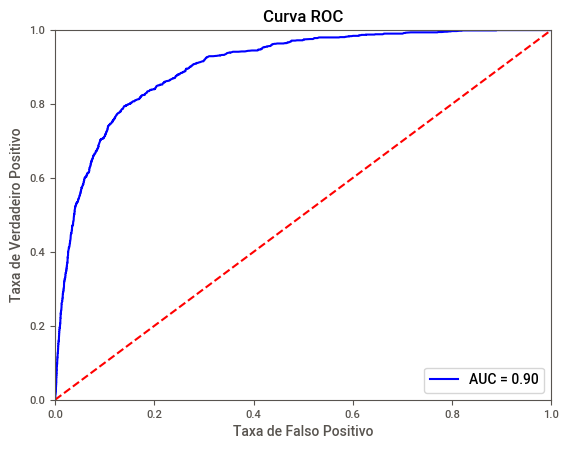

In [64]:
plt.title('Curva ROC')
plt.plot(taxa_falso_positivo, taxa_verdadeiro_positivo,
         'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

O algorítimo está conseguindo ordenar, trazendo primeiramente os dados verdadeiros positivos, ou seja, aqueles que tem maior potencial de contratar o investimento.

### 5.2.4 Métricas

A precision informa sobre a qualidade das previsões positivas do modelo. Uma precisão alta significa que poucas instâncias negativas são incorretamente classificadas como positivas. Por outro lado, uma precisão baixa indica que o modelo está fazendo muitas previsões positivas incorretas.

A recall informa sobre a capacidade do modelo de identificar todas as instâncias positivas. Uma recall alta significa que poucas instâncias positivas são incorretamente classificadas como negativas. Por outro lado, uma recall baixa indica que o modelo está perdendo muitas instâncias positivas, classificando-as como negativas.

A precision mede a qualidade das previsões positivas do modelo, enquanto a recall mede a capacidade do modelo de identificar todas as instâncias positivas. Ambas as métricas são importantes e devem ser consideradas em conjunto.

#### 5.2.4.1 Precision

In [65]:
precision_score(y_teste, gb_grid.predict(x_teste))

0.6507115135834411

#### 5.2.4.2 Recall

In [66]:
recall_score(y_teste, gb_grid.predict(x_teste))

0.43287435456110157

#### 5.2.4.3 Matriz de Confusão

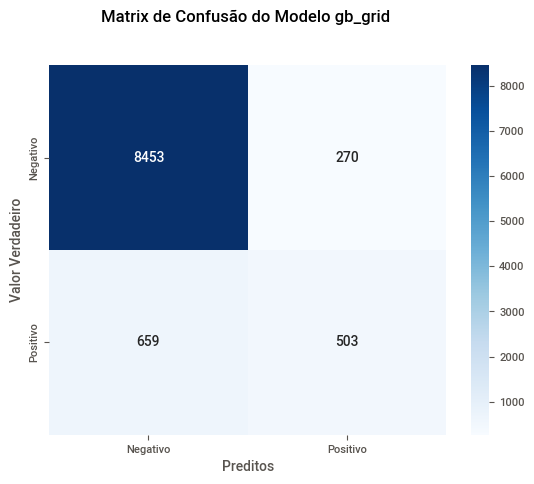

In [67]:
cf_matrix = confusion_matrix(y_teste, gb_grid.predict(x_teste))

ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt='.4g')
ax.set_title("Matrix de Confusão do Modelo gb_grid \n\n")
ax.set_xlabel("Preditos")
ax.set_ylabel('Valor Verdadeiro')
ax.xaxis.set_ticklabels(['Negativo', 'Positivo'])
ax.yaxis.set_ticklabels(['Negativo', 'Positivo'])

plt.show()



Na precision eu tenho 503 dados classificados como positivo que de fato são positivos e 270 falsos positivos, ou seja, 65,07% de acerto.

Na recall de todos que eram positivos, ou seja, 659+503 = 1162, 503 são positivos de verdade. Então 43,29%.

Então dos 65,07% de acerto, só foi considerado 43,29% da base de dados positiva.

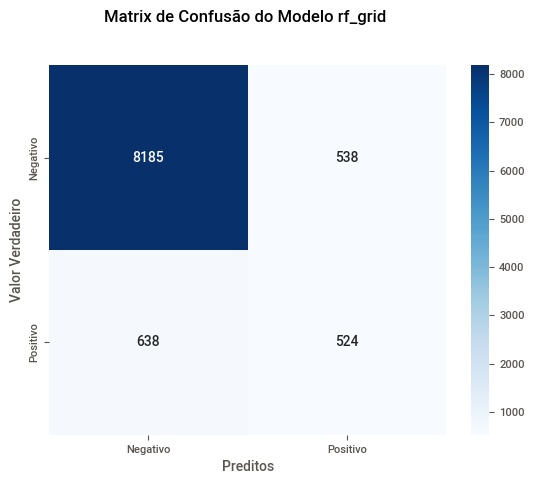

In [72]:
cf_matrix_rf = confusion_matrix(y_teste, rf_grid.predict(x_teste))

ax = sns.heatmap(cf_matrix_rf, annot=True, cmap="Blues", fmt='.4g')
ax.set_title("Matrix de Confusão do Modelo rf_grid \n\n")
ax.set_xlabel("Preditos")
ax.set_ylabel('Valor Verdadeiro')
ax.xaxis.set_ticklabels(['Negativo', 'Positivo'])
ax.yaxis.set_ticklabels(['Negativo', 'Positivo'])

plt.show()

## 5.3 Serialização do Modelo

Converter um modelo treinado em uma representação serializada que possa ser armazenada em disco permitindo salvar o modelo para uso futuro, e implata-lo de forma eficiente.

### 5.3.1 Criando a serialização

In [68]:
with open('ModeloGridMiniCurso.pkl', 'wb') as modelo:
  pickle.dump(gb_grid, modelo)

### 5.3.2 Fazendo a Leitura do Modelo Serializado

In [69]:
modelo_pickle = pickle.load(open('ModeloGridMiniCurso.pkl', 'rb'))
modelo_pickle

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score, response_method='predict'))

# 6. Realizando a Predição